In [1]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Curreny Exchange Rates compared to the US dollar from around the world 22 for 2008-2018
gdp_per_industry = pa.read_csv('https://www.dropbox.com/s/emd7111t9g0rtd2/career_projections_group.csv?dl=1')
workforce_demographic2018 = pa.read_csv('https://www.dropbox.com/s/w1zzumsadlgg9pn/Colorado_Current_Workforce_Demographic.csv?dl=1')

gdp_per_industry = gdp_per_industry.drop(0)
workforce_demographic2018 = workforce_demographic2018.drop(0)

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm

In [2]:
workforce_demographic2018['OCC_GROUP'] = workforce_demographic2018['OCC_GROUP'].astype(str)
detailed_groups_df = workforce_demographic2018.loc[workforce_demographic2018.OCC_GROUP.apply(lambda cat: 'detailed' in cat)]
detailed_groups_raw_data = detailed_groups_df.drop(['AREA','STATE','ST','OCC_GROUP','OCC_TITLE','ANNUAL','HOURLY'], axis=1)

In [26]:
detailed_groups_final.head()

,OCC_CODE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
5,112011,390.0,25.9,0.147,0.84,59.12,122970.0,7.1,27.10,45.76,58.58,68.07,87.05,56380.0,95180.0,121850.0,141580.0,181070.0
8,112031,1240.0,4.6,0.474,0.95,65.86,136990.0,2.1,36.52,45.86,61.70,78.47,98.37,75970.0,95390.0,128330.0,163210.0,204600.0
9,113011,2390.0,3.2,0.913,0.47,57.52,119650.0,1.7,30.26,41.16,54.48,70.10,87.39,62940.0,85620.0,113320.0,145800.0,181770.0
12,113051,1160.0,4.8,0.441,0.35,61.72,128380.0,2.4,30.50,41.67,56.35,74.97,97.65,63430.0,86670.0,117200.0,155940.0,203100.0
13,113061,800.0,4.7,0.307,0.64,69.27,144090.0,1.8,44.21,54.89,64.82,78.24,96.96,91950.0,114160.0,134820.0,162730.0,201680.0


In [3]:
detailed_groups_raw_data = detailed_groups_raw_data.replace('-','',regex=True)
gdp_per_industry = gdp_per_industry.replace('-','',regex=True)
detailed_groups_raw_data = detailed_groups_raw_data.replace(',','',regex=True)
detailed_groups_raw_data = detailed_groups_raw_data.replace('#',np.nan,regex=True)
detailed_groups_raw_data = detailed_groups_raw_data.replace('*',np.nan)
detailed_groups_raw_data = detailed_groups_raw_data.replace('**',np.nan)

In [4]:
detailed_groups_final = detailed_groups_raw_data.apply(pa.to_numeric)

In [25]:
detailed_groups_final = detailed_groups_final.dropna()

In [28]:
from sklearn.preprocessing import LabelEncoder

X = np.array(detailed_groups_final.iloc[:,1:])
y = np.array(detailed_groups_final.iloc[:,0:1])
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [50]:
from sklearn.model_selection import StratifiedKFold

In [53]:
from sklearn.cluster import KMeans

In [54]:
def cluster_plot(cluster, X):
       
    n_clusters = cluster.get_params()['n_clusters']
    cmap_bold = pltco.ListedColormap([cm.hot(k/n_clusters) for k in range(n_clusters) ])  
    # We need a color map that expands to match the number of clusters

    plt.scatter(X[:, 0], X[:, 1], c=cluster.fit_predict(X), cmap=cmap_bold,marker='.')

In [63]:
detailed_groups_final.head()

,OCC_CODE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
5,112011,390.0,25.9,0.147,0.84,59.12,122970.0,7.1,27.10,45.76,58.58,68.07,87.05,56380.0,95180.0,121850.0,141580.0,181070.0
8,112031,1240.0,4.6,0.474,0.95,65.86,136990.0,2.1,36.52,45.86,61.70,78.47,98.37,75970.0,95390.0,128330.0,163210.0,204600.0
9,113011,2390.0,3.2,0.913,0.47,57.52,119650.0,1.7,30.26,41.16,54.48,70.10,87.39,62940.0,85620.0,113320.0,145800.0,181770.0
12,113051,1160.0,4.8,0.441,0.35,61.72,128380.0,2.4,30.50,41.67,56.35,74.97,97.65,63430.0,86670.0,117200.0,155940.0,203100.0
13,113061,800.0,4.7,0.307,0.64,69.27,144090.0,1.8,44.21,54.89,64.82,78.24,96.96,91950.0,114160.0,134820.0,162730.0,201680.0


In [75]:
km = KMeans(n_clusters=10).fit(detailed_groups_final[['TOT_EMP', 'JOBS_1000','H_MEAN','MEAN_PRSE']])

In [82]:
cluster_map = pa.DataFrame()
cluster_map['Cluster'] = km.labels_
cluster_map['OCC CODE'] = detailed_groups_final.OCC_CODE.values
cluster_map['JOBS PER 1000'] = detailed_groups_final.JOBS_1000.values
cluster_map['MEAN_PRSE'] = detailed_groups_final.MEAN_PRSE.values
cluster_map["Total Employees"] = detailed_groups_final.TOT_EMP.values
cluster_map["Hourly Mean"] = detailed_groups_final.H_MEAN.values

In [ ]:
cluster_plot(cluster_map, TOT_EMP)

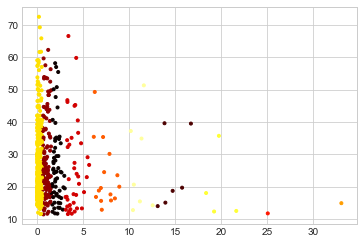

In [92]:
detailed_cluster_example = detailed_groups_final[['JOBS_1000', 'H_MEAN','TOT_EMP','MEAN_PRSE']].to_numpy()
cluster = KMeans(n_clusters=10)
cluster_plot(km, detailed_cluster_example)

In [96]:
#for i in range (10):
 #   print(cluster_map[cluster_map.Cluster == i])

In [97]:
from sklearn import preprocessing

x = detailed_groups_final.values #returns a numpy array   .loc[:,'TOT_EMP':]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

detailed_groups_normalized = pa.DataFrame(x_scaled)

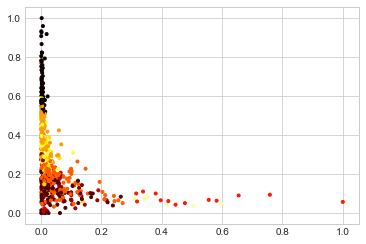

In [111]:
detailed_cluster_example = detailed_groups_normalized.loc[:,1:6].to_numpy()
cluster = KMeans(n_clusters=10).fit(detailed_groups_final[['TOT_EMP', 'JOBS_1000','H_MEAN','MEAN_PRSE']])
cluster_plot(km, detailed_cluster_example)

In [112]:
cluster_map = pa.DataFrame()
cluster_map['Cluster'] = cluster.labels_
cluster_map['OCC CODE'] = detailed_groups_final.OCC_CODE.values
cluster_map['JOBS PER 1000'] = detailed_groups_final.JOBS_1000.values
cluster_map['MEAN_PRSE'] = detailed_groups_final.MEAN_PRSE.values
cluster_map["Total Employees"] = detailed_groups_final.TOT_EMP.values
cluster_map["Hourly Mean"] = detailed_groups_final.H_MEAN.values

In [113]:
for i in range (10):
    print(cluster_map[cluster_map.Cluster == i])

     Cluster  OCC CODE  JOBS PER 1000  MEAN_PRSE  Total Employees  Hourly Mean
0          0    112011          0.147        7.1            390.0        59.12
1          0    112031          0.474        2.1           1240.0        65.86
3          0    113051          0.441        2.4           1160.0        61.72
4          0    113061          0.307        1.8            800.0        69.27
5          0    113071          0.508        3.4           1330.0        57.01
6          0    113131          0.178        4.4            470.0        58.80
8          0    119031          0.346        3.2            910.0        25.08
10         0    119039          0.207        2.7            540.0        49.69
11         0    119061          0.023        9.3             60.0        37.19
12         0    119071          0.029        7.2             80.0        38.38
13         0    119081          0.308        4.9            810.0        39.67
15         0    119131          0.077        0.7    